In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt




/kaggle/input/housing-prices-dataset/Housing.csv


In [ ]:
data = np.loadtxt('/home/udbhav-purwar/Documents/Project/ML_Models/Linear Regression/Housing.csv',
                  delimiter=',', usecols=(0,1,2), skiprows=1)

y = data[:, 0]        
arr = data[:, 1:]   
# Mean (μ) of a feature column:
# μ = (1 / n) * Σ(xᵢ)
# where:
#   - n = number of samples (rows)
#   - xᵢ = value of the i-th sample in that column

# Standard Deviation (σ) of a feature column:
# σ = √((1 / n) * Σ((xᵢ - μ)²))
# where:
#   - μ = mean of that feature column
#   - xᵢ = value of the i-th sample


# Normalize features
X_mean = np.mean(arr, axis=0) # axis=0 → column-wise mean
X_std  = np.std(arr, axis=0)
arr_scaled = (arr - X_mean) / X_std

# Add bias column
ones = np.ones((arr_scaled.shape[0], 1))
X = np.hstack((ones, arr_scaled))

# Normalize target (price)
y_mean = np.mean(y)
y_std  = np.std(y)
y_scaled = (y - y_mean) / y_std



In [49]:
# Set the random seed for reproducibility
# → ensures that random operations (like shuffling) give the same result every time you run the code
np.random.seed(42)

# Create an array of indices [0, 1, 2, ..., n-1] where n = number of samples
# → used to reference rows of X and y
indices = np.arange(X.shape[0])

# Shuffle the indices randomly (in place)
# → changes the order of the indices so that the data will be randomized
np.random.shuffle(indices)

# Compute the split index for 80% training and 20% testing
# → int() ensures it’s an integer
split = int(0.8 * len(indices))

# Split the shuffled indices into training and testing sets
# → first 80% indices for training, remaining 20% for testing
train_idx, test_idx = indices[:split], indices[split:]

# Use the shuffled indices to split X (features) and y (target)
# → ensures that both X and y are split in the same random order
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]


In [50]:




# Initialize params
# Learning rate (α) — controls how big each step of gradient descent is
a = 0.01

# Number of times we’ll repeat gradient descent (epochs)
epochs = 2000

# Number of training samples
m = len(X_train)

# Initialize parameters (θ₀, θ₁, θ₂) with zeros
# X_train.shape[1] gives number of features (including bias column)
t = np.zeros(X_train.shape[1])

# Start Gradient Descent loop
for epoch in range(epochs):
    
    # Create an empty array to store the sum of gradients for each θ
    # Here we have 3 parameters: θ₀, θ₁, θ₂
    sum_errors = np.zeros(3)
    
    # Loop over each training example
    for i in range(m):
        # Step 1: Compute hypothesis (predicted y)
        # h = θ₀*x₀ + θ₁*x₁ + θ₂*x₂
        h = t[0]*X_train[i][0] + t[1]*X_train[i][1] + t[2]*X_train[i][2]
        
        # Step 2: Calculate error (difference between prediction and actual)
        e = h - y_train[i]
        
        # Step 3: Accumulate partial derivatives for each θ
        # For each feature j → gradient_j = Σ(e * xᵢⱼ)
        sum_errors[0] += e * X_train[i][0]
        sum_errors[1] += e * X_train[i][1]
        sum_errors[2] += e * X_train[i][2]
    
    # Step 4: Average the gradients (since we used the sum)
    grad = sum_errors / m
    
    # Step 5: Update all θ values simultaneously
    # θ = θ - α * gradient
    t = t - a * grad
    
    # Step 6 (Optional): Compute cost every 100 iterations for monitoring
    if epoch % 100 == 0:
      predictions = np.dot(X_train, t)
      cost = (1 / (2*m)) * np.sum((predictions - y_train)**2)
      print(f"Iteration {epoch}: Cost = {cost:.6f}")



Iteration 0: Cost = 0.494765
Iteration 100: Cost = 0.333111
Iteration 200: Cost = 0.317540
Iteration 300: Cost = 0.316020
Iteration 400: Cost = 0.315869
Iteration 500: Cost = 0.315853
Iteration 600: Cost = 0.315851
Iteration 700: Cost = 0.315851
Iteration 800: Cost = 0.315851
Iteration 900: Cost = 0.315851
Iteration 1000: Cost = 0.315851
Iteration 1100: Cost = 0.315851
Iteration 1200: Cost = 0.315851
Iteration 1300: Cost = 0.315851
Iteration 1400: Cost = 0.315851
Iteration 1500: Cost = 0.315851
Iteration 1600: Cost = 0.315851
Iteration 1700: Cost = 0.315851
Iteration 1800: Cost = 0.315851
Iteration 1900: Cost = 0.315851


In [51]:
y_pred_scaled = np.array([t[0]*X_test[i][0] + t[1]*X_test[i][1] + t[2]*X_test[i][2] for i in range(len(X_test))])
y_pred = y_pred_scaled * y_std + y_mean   # convert back to original scale
y_actual = y[test_idx]                    

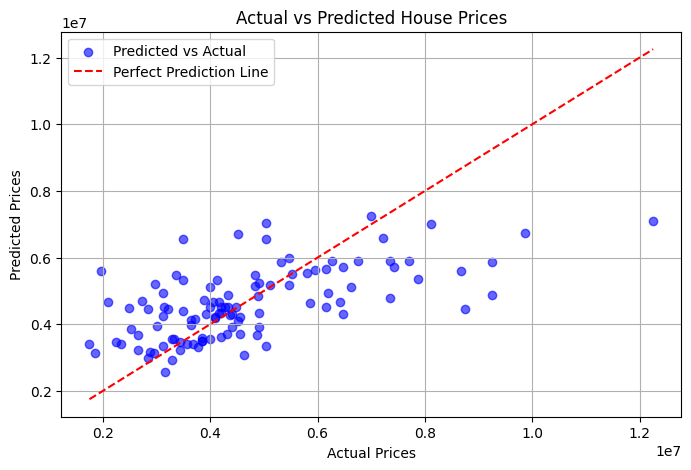

In [52]:
plt.figure(figsize=(8,5))
plt.scatter(y_actual, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
# Calculate the residual sum of squares (SS_res)
# SS_res = Σ( (y_actualᵢ - y_predᵢ)² )
# → measures how far the predictions are from the true values
ss_res = np.sum((y_actual - y_pred)**2)

# Calculate the total sum of squares (SS_tot)
# SS_tot = Σ( (y_actualᵢ - ȳ)² )
# → measures total variation of actual data from the mean
ss_tot = np.sum((y_actual - np.mean(y_actual))**2)

# Compute R² Score
# Formula: R² = 1 - (SS_res / SS_tot)
# → measures how much variance in y is explained by the model
r2 = 1 - (ss_res / ss_tot)

# Print the result
print("\nR² Score:", r2)




R² Score: 0.3807979759144713
